In [7]:
%load_ext autoreload
%autoreload 2

In [15]:
import os
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [1]:
from cora_data import CoraData 
from train import train_one_model

In [6]:
data_root = os.path.join(os.path.expanduser('~/ml_datasets/'), 'cora')
val_frac = 0.15
test_frac = 0.15
data = CoraData(data_root, val_frac, test_frac)

features_map = tf.keras.layers.Embedding(
    data.features.shape[0], 
    data.features.shape[1],
    embeddings_initializer=tf.keras.initializers.Constant(data.features),
    trainable=False
)

num_classes = len(data.class2id)
input_dim = data.features.shape[1]


In [25]:
# Training parameters
num_epochs = 15
batch_size = 256
learning_rate = 0.03

# Graph SAGE parameters
num_sampled_neighbors = 10
K = 2
hidden_dims = [512, 128]
agg_method = 'mean'

In [17]:
def adjustAxeProperties(ax_obj, x_fontsize, x_rotation, y_fontsize, y_rotation):
    for tick in ax_obj.xaxis.get_major_ticks():
        tick.label.set_fontsize(x_fontsize)
        tick.label.set_rotation(x_rotation)
    for tick in ax_obj.yaxis.get_major_ticks():
        tick.label.set_fontsize(y_fontsize)
        tick.label.set_rotation(y_rotation)

In [26]:
model, epoch_train_loss, epoch_train_accuracy, epoch_val_loss, epoch_val_accuracy = train_one_model(
    data, 
    features_map, 
    num_classes, 
    K, 
    input_dim, 
    hidden_dims, 
    num_sampled_neighbors, 
    agg_method,
    learning_rate, 
    num_epochs, 
    batch_size
)


epoch 1 took 17.6 seconds
train loss: 0.9134200215339661, train accuracy: 0.7064700126647949
val loss: 0.6395300030708313, val accuracy: 0.8163800239562988
 
epoch 6 took 16.83 seconds
train loss: 0.09074000269174576, train accuracy: 0.9765599966049194
val loss: 0.42379000782966614, val accuracy: 0.8585600256919861
 
epoch 11 took 17.91 seconds
train loss: 0.022450000047683716, train accuracy: 0.9944199919700623
val loss: 0.5440199971199036, val accuracy: 0.8511199951171875
 


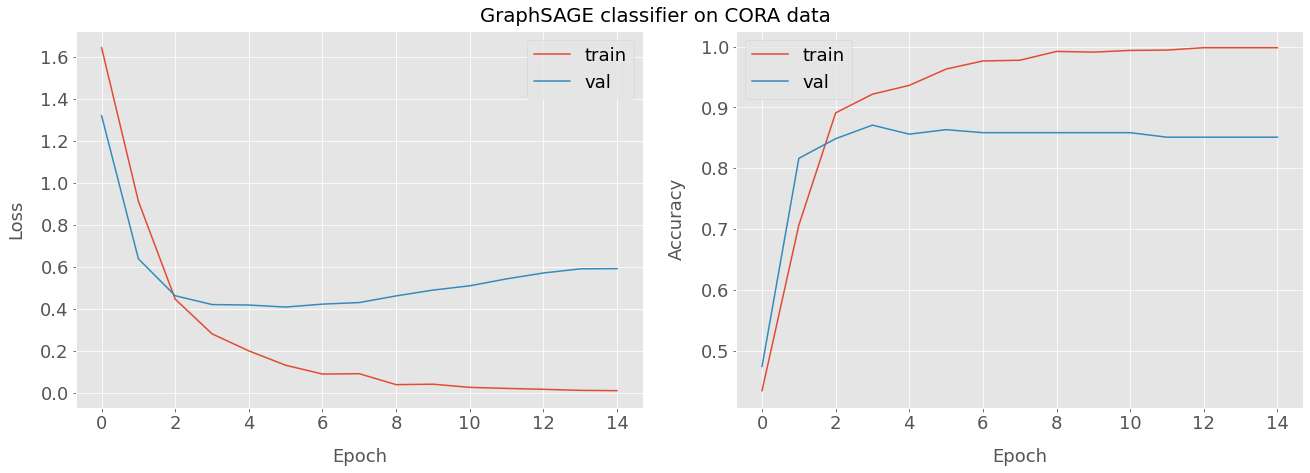

In [27]:
fontsize = 18
plt.close('all')
fig = plt.figure(figsize=(18, 6.5))
gs = matplotlib.gridspec.GridSpec(1, 2)

ax = plt.subplot(gs[0, 0])
ax.plot(epoch_train_loss, label='train')
ax.plot(epoch_val_loss, label='val')
ax.legend(loc='best', fontsize=fontsize)
ax.set_xlabel('Epoch', fontsize=fontsize, labelpad=15)
ax.set_ylabel('Loss', fontsize=fontsize, labelpad=15)
adjustAxeProperties(ax, fontsize, 0, fontsize, 0)


ax = plt.subplot(gs[0, 1])
ax.plot(epoch_train_accuracy, label='train')
ax.plot(epoch_val_accuracy, label='val')
ax.legend(loc='best', fontsize=fontsize)
ax.set_xlabel('Epoch', fontsize=fontsize, labelpad=15)
ax.set_ylabel('Accuracy', fontsize=fontsize, labelpad=15)
adjustAxeProperties(ax, fontsize, 0, fontsize, 0)


plt.tight_layout(pad=0, w_pad=2.5, h_pad=0)
fig.suptitle('GraphSAGE classifier on CORA data', fontsize=fontsize*1.1)
plt.subplots_adjust(top=0.93)